# 🔍 วิเคราะห์ PM2.5 กับจำนวนผู้ป่วยทางเดินหายใจด้วย Machine Learning

เอกสารนี้ออกแบบมาเพื่อช่วยให้ครูสามารถสอนหลักการเบื้องต้นของ Machine Learning ผ่านกรณีศึกษาที่มีข้อมูลจริง เช่น PM2.5, อุณหภูมิ, ความชื้น และจำนวนผู้ป่วยทางเดินหายใจ

## ✅ ขั้นตอนที่ 1: ติดตั้งและโหลดไลบรารีที่จำเป็น
ไลบรารีเหล่านี้ช่วยให้สามารถจัดการข้อมูล สร้างโมเดล และแสดงผลวิเคราะห์ได้ง่ายขึ้น

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## 📁 ขั้นตอนที่ 2: อัปโหลดไฟล์ข้อมูล CSV
ให้ครูหรือนักเรียนอัปโหลดไฟล์ `Large_PM25_Health_Dataset.csv` เพื่อเริ่มต้นการวิเคราะห์

In [21]:
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded)) # Get the name of the uploaded file
df = pd.read_csv(file_name) # Use the uploaded file name to read the csv

Saving Simulated_PM2_5_and_Health_Symptoms_Dataset (1).csv to Simulated_PM2_5_and_Health_Symptoms_Dataset (1) (3).csv


## 🔍 ขั้นตอนที่ 3: วิเคราะห์ข้อมูลเบื้องต้น (EDA)
เพื่อทำความเข้าใจข้อมูล เช่น มีข้อมูลกี่แถว แต่ละคอลัมน์คืออะไร และข้อมูลมีความสัมพันธ์กันหรือไม่

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       200 non-null    float64
 1   PM10        200 non-null    float64
 2   CO          200 non-null    float64
 3   O3          200 non-null    float64
 4   Coughing    200 non-null    object 
 5   Headache    200 non-null    object 
 6   Asthma      200 non-null    object 
 7   Risk_Level  200 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.6+ KB
None
            PM2.5        PM10          CO          O3
count  200.000000  200.000000  200.000000  200.000000
mean    59.058194   69.487535    0.674303   30.089666
std     23.084428   24.047284    0.298213   10.195743
min     10.000000   15.092457   -0.041493    3.031134
25%     42.371808   52.043549    0.461836   22.935308
50%     59.895203   71.758025    0.676720   30.222625
75%     72.521312   83.706488    0.871626   36.851

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Laksaman.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Laksaman.
  fig.canvas.print_figure(bytes_io, **kw)


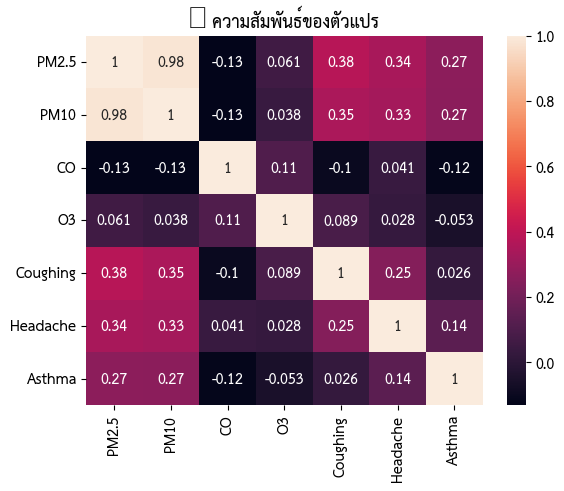

In [22]:
print(df.info())
print(df.describe())

# Convert 'Yes'/'No' columns to numerical (1/0)
binary_cols = ['Coughing', 'Headache', 'Asthma']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("📊 ความสัมพันธ์ของตัวแปร")
plt.show()

## 🛠️ ขั้นตอนที่ 4: เตรียมข้อมูลสำหรับการสร้างโมเดล
เลือกตัวแปรต้น (X) และตัวแปรตาม (y) และแบ่งข้อมูลเป็นชุดฝึกกับชุดทดสอบ

In [26]:
X = df[['PM2.5']]
y = df['Coughing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 ขั้นตอนที่ 5: สร้างโมเดล Linear Regression
ใช้โมเดลพื้นฐานเพื่อให้เห็นภาพการพยากรณ์จากข้อมูลอย่างง่าย

In [27]:

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


## 🌳 ขั้นตอนที่ 6: ทดลองโมเดลอื่น ๆ (Decision Tree และ Random Forest)
เพื่อเปรียบเทียบว่าโมเดลแบบต้นไม้หรือแบบรวมหลายต้นจะให้ผลดีกว่าหรือไม่

In [28]:

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)


## 📏 ขั้นตอนที่ 7: ประเมินความแม่นยำของแต่ละโมเดล
ใช้ค่าความคลาดเคลื่อน (MSE) และคะแนนความแม่นยำ (R²) เพื่อดูว่าโมเดลไหนดีที่สุด

In [29]:

def evaluate_model(name, y_true, y_pred):
    print(f"📌 {name}")
    print("MSE:", round(mean_squared_error(y_true, y_pred), 2))
    print("R²:", round(r2_score(y_true, y_pred), 2))
    print()

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Random Forest", y_test, y_pred_forest)


📌 Linear Regression
MSE: 0.22
R²: -0.16

📌 Decision Tree
MSE: 0.35
R²: -0.87

📌 Random Forest
MSE: 0.23
R²: -0.22



## 📈 ขั้นตอนที่ 8: เปรียบเทียบค่าทำนายกับค่าจริงด้วยกราฟ
สุ่มข้อมูลบางส่วนมาเปรียบเทียบว่าค่าที่โมเดลทำนายใกล้เคียงกับของจริงแค่ไหน

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Laksaman.
  fig.canvas.print_figure(bytes_io, **kw)


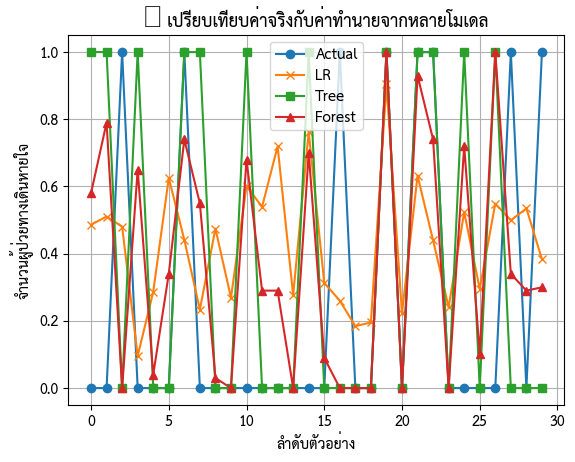

In [30]:

import numpy as np
sample_size = 30
indices = np.random.choice(range(len(y_test)), size=sample_size, replace=False)

plt.plot(y_test.iloc[indices].values, label="Actual", marker='o')
plt.plot(y_pred_lr[indices], label="LR", marker='x')
plt.plot(y_pred_tree[indices], label="Tree", marker='s')
plt.plot(y_pred_forest[indices], label="Forest", marker='^')
plt.legend()
plt.title("🔍 เปรียบเทียบค่าจริงกับค่าทำนายจากหลายโมเดล")
plt.xlabel("ลำดับตัวอย่าง")
plt.ylabel("จำนวนผู้ป่วยทางเดินหายใจ")
plt.grid(True)
plt.show()
